In [1]:
import pandas as pd
import numpy as np
import numpy
import new_extractor as ext
import os

In [2]:
def readExecutionData(num_experiences, framework, device, benchmark, benchmark_path, start_at = 1):
    executions = []
    for execution_counter in range(start_at, num_experiences + 1):
        memory_path = os.path.join(benchmark_path, f"meminfo-{execution_counter}.txt")
        try:
            memory_data = ext.get_memory(memory_path)
        except FileNotFoundError:
            memory_data = [numpy.NaN] * 4

        energy_path = os.path.join(benchmark_path, f"batterystats-{execution_counter}.txt")
        try:
            voltage = ext.get_voltage(energy_path)
            app_id = ext.get_appid(energy_path)

            energy = ext.get_energy(energy_path, app_id, voltage)
            time_data = ext.get_time(energy_path, app_id)
        except FileNotFoundError:
            energy = numpy.NaN
            time_data = [numpy.NaN] * 2
        
        data_path = os.path.join(benchmark_path, f"procstats-{execution_counter}.txt")
        try:
            package = ext.get_package(energy_path)
            proc_data = ext.get_data(data_path, package)
        except FileNotFoundError:
            proc_data = [numpy.NaN] * 3
            package = None

        frame_path = os.path.join(benchmark_path, f"gfxinfo-{execution_counter}.txt")
        try:
            pass
        except FileNotFoundError:
            pass
        
        executions.append([framework, device, benchmark, execution_counter, *memory_data, *proc_data, energy, *time_data])
    return executions

def getDataFrame(benchmarks):
    return pd.DataFrame(benchmarks, columns=['framework', 'device', 'benchmark', 'execution', 'memory', 'heap_free', 'heap_alloc', 'heap_size', 'mem_data_low', 'mem_data_med', 'mem_data_high', 'energy', 'foreground_time', 'cpu_time'])

unique = lambda x: list(set(x))
    

<h1>Data - Bench</h1>

In [3]:
num_experiences = 45
experiment_relative_path = 'experiment-results'
benchmarks = ext.readExperimentResult(experiment_relative_path, num_experiences , readExecutionData, 16)
full_df = getDataFrame(benchmarks)
full_df

,framework,device,benchmark,execution,memory,heap_free,heap_alloc,heap_size,mem_data_low,mem_data_med,mem_data_high,energy,foreground_time,cpu_time
0,C#,SM-G781B,fannkuch-11,16,106.188,8.282,29.715,37.998,104.0,104.0,104.0,6.410790,1.469,7.396
1,C#,SM-G781B,fannkuch-11,17,101.710,8.245,29.599,37.845,99.0,99.0,99.0,6.586830,1.520,7.323
2,C#,SM-G781B,fannkuch-11,18,101.736,8.233,29.571,37.805,99.0,99.0,99.0,6.430651,1.558,7.392
3,C#,SM-G781B,fannkuch-11,19,101.768,8.129,29.559,37.689,99.0,99.0,99.0,6.637140,1.480,7.281
4,C#,SM-G781B,fannkuch-11,20,106.682,8.212,29.532,37.745,104.0,104.0,104.0,6.445400,1.489,7.404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,REACT,SM-G781B,fannkuch-11,41,119.716,7.647,16.287,23.935,117.0,117.0,117.0,15.570432,18.237,19.576
296,REACT,SM-G781B,fannkuch-11,42,119.361,7.676,16.104,23.781,117.0,117.0,117.0,16.141824,18.772,20.122
297,REACT,SM-G781B,fannkuch-11,43,119.641,7.695,16.044,23.740,117.0,117.0,117.0,15.790176,18.073,19.294
298,REACT,SM-G781B,fannkuch-11,44,119.222,7.711,16.229,23.941,116.0,116.0,116.0,15.645312,18.189,19.598


In [11]:
csharp_df = full_df[full_df["framework"] == "JAVA"]
regex_df = csharp_df[csharp_df['benchmark'].str.contains("fannkuch")]
regex_df

,framework,device,benchmark,execution,memory,heap_free,heap_alloc,heap_size,mem_data_low,mem_data_med,mem_data_high,energy,foreground_time,cpu_time
1680,JAVA,SM-G781B,nbody-22500000,16,21.600,7.129,13.551,20.681,21.0,21.0,21.0,2.968877,10.344,4.713
1681,JAVA,SM-G781B,nbody-22500000,17,25.215,7.125,13.555,20.681,25.0,25.0,25.0,3.026246,10.341,4.750
1682,JAVA,SM-G781B,nbody-22500000,18,21.673,7.133,13.547,20.681,21.0,21.0,21.0,3.011904,10.285,4.729
1683,JAVA,SM-G781B,nbody-22500000,19,21.497,7.122,13.477,20.600,21.0,21.0,21.0,3.026246,10.294,4.732
1684,JAVA,SM-G781B,nbody-22500000,20,21.650,7.115,13.565,20.681,21.0,21.0,21.0,3.227040,10.357,4.736
1685,JAVA,SM-G781B,nbody-22500000,21,25.165,7.116,13.564,20.681,25.0,25.0,25.0,3.011904,10.306,4.751
1686,JAVA,SM-G781B,nbody-22500000,22,21.571,7.098,13.554,20.653,21.0,21.0,21.0,3.026246,10.335,4.744
1687,JAVA,SM-G781B,nbody-22500000,23,21.754,7.080,13.560,20.641,21.0,21.0,21.0,3.026246,10.369,4.721
1688,JAVA,SM-G781B,nbody-22500000,24,21.593,7.115,13.469,20.585,21.0,21.0,21.0,3.011904,10.305,4.737
1689,JAVA,SM-G781B,nbody-22500000,25,20.503,7.103,13.517,20.621,20.0,20.0,20.0,3.011904,10.260,4.733


In [7]:
device = "SM-G781B"
no_nan_df = full_df.dropna(axis=0).reset_index(drop=True)
benchmarks = unique(no_nan_df["benchmark"].tolist())
result = []
for benchmark in benchmarks:
    benchmark_df = no_nan_df.loc[ (no_nan_df['benchmark'] == benchmark) & (no_nan_df['device'] == device)]
    benchmark_df.drop(benchmark_df[benchmark_df['execution'] <= 15].index, inplace = True)
    for framework in unique(benchmark_df['framework']):
        framework_df = benchmark_df.loc[benchmark_df['framework'] == framework]
        foregroundTime = framework_df['foreground_time'].mean()
        cpu_time = framework_df['cpu_time'].mean()
        memory = framework_df['memory'].mean()
        energy = framework_df['energy'].mean()
        result.append([benchmark, framework, foregroundTime, cpu_time, memory, energy])
mean_df = pd.DataFrame(result, columns=["benchmark", "framework", "foreground_time", "cpu_time", "memory", "energy"])
mean_df

C:\Users\BernardoJr\AppData\Local\Temp\ipykernel_15032\241828850.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df.drop(benchmark_df[benchmark_df['execution'] <= 15].index, inplace = True)


,benchmark,framework,foreground_time,cpu_time,memory,energy
0,mandelbrot-27000,JAVA,99.506400,94.284400,21.364300,86.800114
1,mandelbrot-27000,FLUTTER,60.620833,53.180500,174.812333,71.555348
2,spectral-6500,JAVA,8.831367,3.155700,22.723300,5.442777
3,spectral-6500,IONIC,5.782700,6.088333,133.379800,10.102848
4,spectral-6500,FLUTTER,4.148033,5.815100,74.691933,7.012258
...,...,...,...,...,...,...
65,mandelbrot-4500,IONIC,3.009667,3.293867,158.885367,5.436630
66,mandelbrot-4500,REACT,58.677867,58.719933,118.102567,39.595193
67,mandelbrot-4500,C#,5.787500,38.844867,109.102400,28.463528
68,mandelbrot-4500,JAVA,7.816900,2.308600,29.603433,3.052206


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [9]:
benchmark_test_df = full_df[full_df['benchmark'].str.contains("spectral")]
# g = sns.barplot(
#     data=benchmark_test_df,
#     x="benchmark",
#     y="energy", 
#     hue="framework",
#     errorbar="sd"
# )

a = full_df[full_df['framework'].str.contains("FLUTTER")]
a = a[a['benchmark'].str.contains("spectral")]
a

,framework,device,benchmark,execution,memory,heap_free,heap_alloc,heap_size,mem_data_low,mem_data_med,mem_data_high,energy,foreground_time,cpu_time
1455,FLUTTER,SM-G781B,spectral-29250,16,62.849,8.529,21.569,30.099,61.0,61.0,61.0,68.580864,112.667,111.556
1456,FLUTTER,SM-G781B,spectral-29250,17,74.136,8.218,21.668,29.887,71.0,72.0,72.0,68.580864,112.443,111.465
1457,FLUTTER,SM-G781B,spectral-29250,18,64.702,8.659,21.475,30.135,63.0,63.0,63.0,68.720256,112.507,111.419
1458,FLUTTER,SM-G781B,spectral-29250,19,64.423,8.175,21.611,29.787,63.0,63.0,63.0,68.441472,112.533,111.468
1459,FLUTTER,SM-G781B,spectral-29250,20,74.479,8.425,21.581,30.007,73.0,73.0,73.0,68.720256,112.529,111.413
1460,FLUTTER,SM-G781B,spectral-29250,21,65.589,8.353,21.577,29.931,64.0,64.0,64.0,68.580864,112.518,111.449
1461,FLUTTER,SM-G781B,spectral-29250,22,65.567,8.271,21.475,29.747,64.0,64.0,64.0,68.859648,112.483,111.414
1462,FLUTTER,SM-G781B,spectral-29250,23,65.589,8.384,21.570,29.955,64.0,64.0,64.0,68.720256,112.458,111.430
1463,FLUTTER,SM-G781B,spectral-29250,24,65.817,8.173,21.569,29.743,64.0,64.0,64.0,68.720256,112.499,111.440
1464,FLUTTER,SM-G781B,spectral-29250,25,65.723,8.408,21.470,29.879,64.0,64.0,64.0,68.507280,112.487,111.403


In [10]:
def addPlot(benchmark, dataType, ax):
    binary_df = full_df[full_df['benchmark'].str.contains(benchmark)]
    sns.barplot(
        data=binary_df,
        x="benchmark",
        y=dataType, 
        hue="framework",
        errorbar="sd", 
        palette="dark",
        ax = ax
    ).set(xlabel=None)

In [11]:
def addPlotLine(benchmark, ax):
    addPlot(benchmark, "energy", ax[0])
    addPlot(benchmark, "cpu_time", ax[1])
    addPlot(benchmark, "memory", ax[2])

C:\Users\BernardoJr\AppData\Local\Temp\ipykernel_15032\2331342849.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


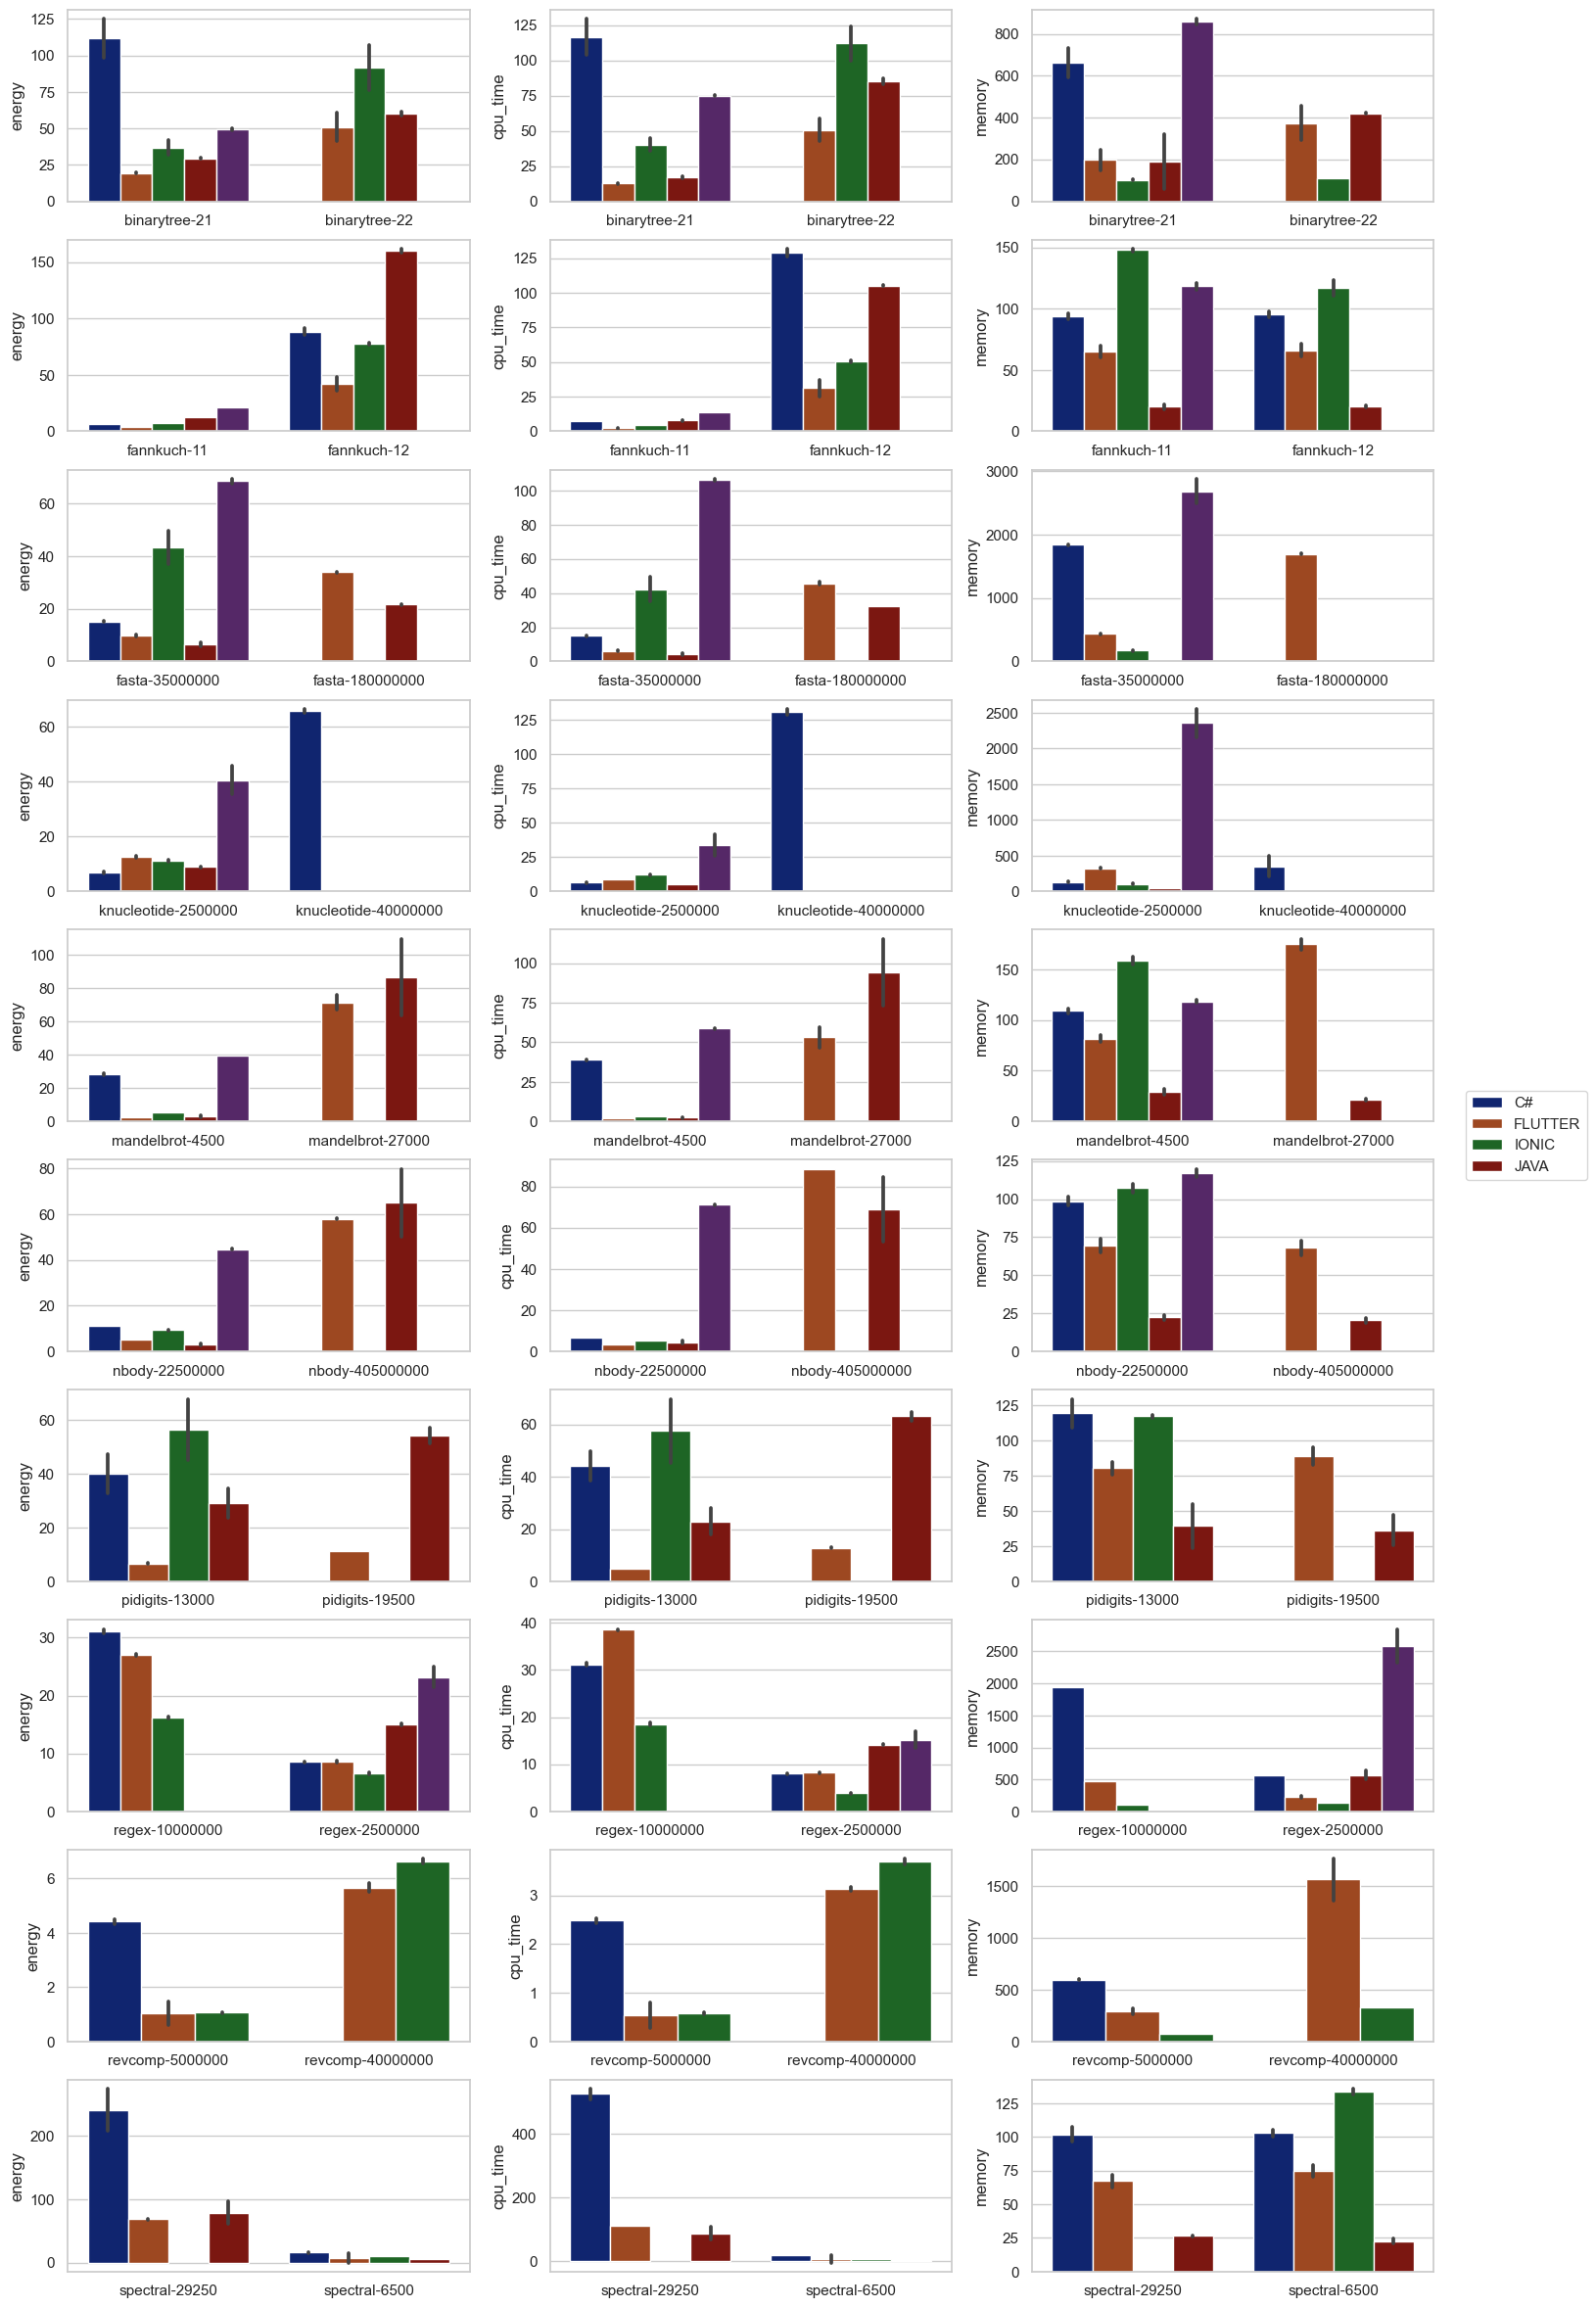

In [12]:
x = 10
y = 3
fig, axs = plt.subplots(x,y, figsize =(18,30))

addPlotLine("binary", axs[0])
addPlotLine("fannkuch", axs[1])
addPlotLine("fasta", axs[2])
addPlotLine("knucleotide", axs[3])
addPlotLine("mandelbrot", axs[4])
addPlotLine("nbody", axs[5])
addPlotLine("pidigits", axs[6])
addPlotLine("regex", axs[7])
addPlotLine("revcomp", axs[8])
addPlotLine("spectral", axs[9])

for i in range(x):
    for j in range(y):
        axs[i][j].get_legend().remove()

# sns.move_legend(plt, "upper left", bbox_to_anchor=(.55, .45), title='Species')
plt.legend(bbox_to_anchor=(1.4,6.2))
plt.tight_layout()